# Modeling

## Imports

In [2]:
# Imported Libraries 
import pandas as pd # pandas library 
import numpy as np # numpy library
import matplotlib.pyplot as plt # Import the pyplot (pythonplot) part of the matlotlib library
import seaborn as sns # seaborn library

from sklearn.model_selection import train_test_split # Train, Validation, Test Split
from sklearn.preprocessing import StandardScaler # Standard Scaling
from sklearn.linear_model import LogisticRegression # Logistic Regression Imports
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


#from mlxtend.plotting import plot_decision_regions # for visualising classification decision boundaries in 2D


## Data Loading

In [48]:
## Data Loading
# Data loading for github only

CLN_DATA_PATH='../data/heart_attack_enc_m.csv'

try:
    heart_attack_enc_m = pd.read_csv(CLN_DATA_PATH, index_col= 0)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("ERROR: The data file does not exist.")

Data loaded successfully.


In [60]:
heart_attack_enc_m.head()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,LastCheckupTime_enc,Gender_enc,GeneralHealth_enc,PhysicalActivities_enc,...,BlindOrVisionDifficulty_enc,DifficultyWalking_enc,DifficultyDressingBathing_enc,DifficultyErrands_enc,ChestScan_enc,AlcoholDrinkers_enc,HIVTesting_enc,FluVaxLast12_enc,PneumoVaxEver_enc,HighRiskLastYear_enc
0,4.0,0.0,9.0,1.60,71.67,27.99,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,6.0,1.78,95.25,30.13,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,8.0,1.85,108.86,31.66,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,5.0,0.0,9.0,1.70,90.72,31.32,0.0,0.0,3.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,3.0,15.0,5.0,1.55,79.38,33.07,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


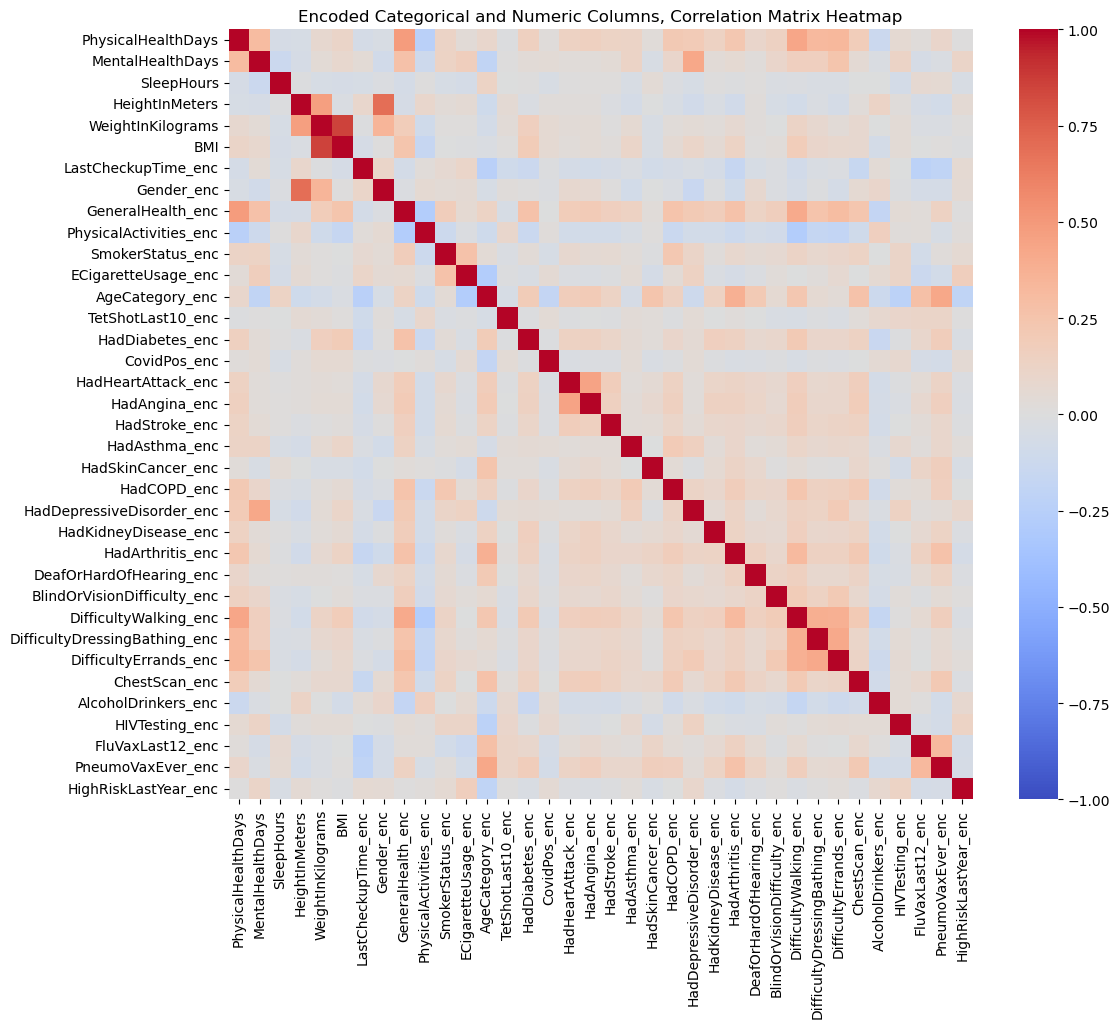

In [152]:
# Select only numerical columns
numeric_columns = heart_attack_enc_m

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,  cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Encoded Categorical and Numeric Columns, Correlation Matrix Heatmap')
plt.show()

In [185]:
high_corr_pairs = corr_matrix[(corr_matrix.abs() <= 0.05) & corr_matrix != 1.0]
high_corr_pairs = high_corr_pairs.dropna(how='all').dropna(axis=1, how='all')
print(high_corr_pairs)

                               PhysicalHealthDays  MentalHealthDays  \
PhysicalHealthDays                       1.000000          0.306811   
MentalHealthDays                         0.306811          1.000000   
SleepHours                              -0.056064         -0.130090   
HeightInMeters                                NaN         -0.055993   
WeightInKilograms                        0.077504               NaN   
BMI                                      0.116906          0.082196   
LastCheckupTime_enc                     -0.063141               NaN   
Gender_enc                                    NaN         -0.091711   
GeneralHealth_enc                        0.489086          0.268538   
PhysicalActivities_enc                  -0.240867         -0.110517   
SmokerStatus_enc                         0.120187          0.125422   
ECigaretteUsage_enc                           NaN          0.168424   
AgeCategory_enc                          0.089879         -0.189787   
TetSho

## Logistic Regression

In [20]:
#Split into X and y
X = heart_attack_enc_m.drop(columns='HadHeartAttack_enc', axis=1)
y = heart_attack_enc_m['HadHeartAttack_enc']


In [205]:
# Spliting into Remainder and Test (80% : 20%)
#X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size = 0.2, random_state=12)
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size = 0.2, random_state=12)

In [206]:
# Splitting the remainder in two, train and validation sets (Of the 80% = 80% : 20%)
X_train, X_val, y_train, y_val = train_test_split(X_remainder, y_remainder, test_size = 0.2,random_state=12) # Always use random states

### Model - Logistic Regression - ASK

#### Logistic Regression Model 1 (logreg_model1)

In [24]:
# Instantiate Model
logreg_model1 = LogisticRegression(max_iter=1000)

# Fit
logreg_model1.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [230]:
# Creating the train and test predictions

y_train_pred = logreg_model1.predict(X_train)
y_val_pred = logreg_model1.predict(X_val)
y_test_pred = logreg_model1.predict(X_test)


In [227]:
print(f'Logistic Regression Train Score: {logreg_model1.score(X_train, y_train).round(2)}\n')
print(f'Logistic Regression Test Score:{logreg_model1.score(X_test, y_test).round(2)}')

Logistic Regression Train Score: 0.95

Logistic Regression Test Score:0.95


In [27]:
# Classification Report (accuracy, precision, recall, f1)
report_val = classification_report(y_val, y_val_pred)
print(report_val)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     37201
         1.0       0.55      0.25      0.34      2160

    accuracy                           0.95     39361
   macro avg       0.76      0.62      0.66     39361
weighted avg       0.94      0.95      0.94     39361



In [28]:
# Classification Report (accuracy, precision, recall, f1)
report_test = classification_report(y_test, y_test_pred)
print(report_test)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     46496
         1.0       0.58      0.25      0.35      2705

    accuracy                           0.95     49201
   macro avg       0.77      0.62      0.66     49201
weighted avg       0.94      0.95      0.94     49201



In [302]:
# Confusion Matrix Train (table + plot)
cm_lr_train = confusion_matrix(y_train, y_train_pred)
print(cm_lr_train)
ConfusionMatrixDisplay(confusion_matrix=logre);

ValueError: Found input variables with inconsistent numbers of samples: [196803, 157442]

In [ ]:
# Confusion Matrix Test (table + plot)
cm_lr_test = confusion_matrix(y_test, y_test_pred)
print(cm_lr_test)
ConfusionMatrixDisplay(logreg_model1, y_test, y_test_pred);

In [222]:
logreg_coeff = pd.DataFrame(logreg_model1.coef_, columns= X_train.columns, index= ["Coeff"]).T
logreg_coeff.sort_values(by= "Coeff", ascending= False)

,Coeff
HadAngina_enc,2.435639
HadStroke_enc,0.845946
Gender_enc,0.690132
ChestScan_enc,0.583366
HadDiabetes_enc,0.315603
GeneralHealth_enc,0.304421
SmokerStatus_enc,0.192392
AgeCategory_enc,0.177123
BlindOrVisionDifficulty_enc,0.165879
HeightInMeters,0.132760


#### Logistic Regression Model 2

Scaling - Logistic Regression Model 2

In [242]:
# Pre-processing - scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [70]:
validation_scores = []
train_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

for c in C_range:
    logreg_model2 = LogisticRegression(max_iter=10000, C = c,random_state=12)
    logreg_model2.fit(X_train,y_train)
    
    # train on traning set
    train_scores.append(logreg_model2.score(X_train,y_train))
    # score on validation set
    validation_scores.append(logreg_model2.score(X_val,y_val))

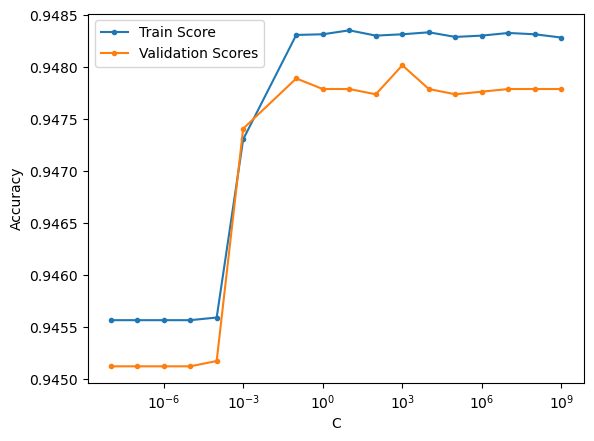

In [71]:
plt.figure()
plt.plot(C_range, train_scores,label="Train Score",marker='.')
plt.plot(C_range, validation_scores,label="Validation Scores",marker='.')
plt.xscale('log') # logarithmic scale needed on this example
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

In [244]:
# Creating the train and test predictions

#y_train_pred = logreg_model1.predict(X_train)
y_train_pred = logreg_model1.predict(X_train_scaled)
y_test_pred = logreg_model1.predict(X_test_scaled)

In [245]:
print(f'Logistic Regression Train Score: {logreg_model2.score(X_train, y_train).round(2)}\n')
#print(f'Logistic Regression Validation Score: {logreg_model2.score(X_val, y_val).round(2)}\n')
print(f'Logistic Regression Test Score:{logreg_model2.score(X_test, y_test).round(2)}')

Logistic Regression Train Score: 0.95

Logistic Regression Test Score:0.95


In [246]:
# Classification Report (accuracy, precision, recall, f1)
report_train_opt = classification_report(y_train, y_train_pred)
print(report_train_opt)

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97    148872
         1.0       0.45      0.52      0.48      8570

    accuracy                           0.94    157442
   macro avg       0.71      0.74      0.72    157442
weighted avg       0.94      0.94      0.94    157442



In [247]:
# Classification Report (accuracy, precision, recall, f1)
report_test = classification_report(y_test, y_test_pred)
print(report_test)

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97     46496
         1.0       0.44      0.52      0.48      2705

    accuracy                           0.94     49201
   macro avg       0.71      0.74      0.72     49201
weighted avg       0.94      0.94      0.94     49201



In [305]:
logreg_coeff2 = pd.DataFrame(logreg_model1.coef_, columns= X_train.columns, index= ["Coeff"]).T
logreg_coeff2.sort_values(by= "Coeff", ascending= False)

,Coeff
HadAngina_enc,2.435639
HadStroke_enc,0.845946
Gender_enc,0.690132
ChestScan_enc,0.583366
HadDiabetes_enc,0.315603
GeneralHealth_enc,0.304421
SmokerStatus_enc,0.192392
AgeCategory_enc,0.177123
BlindOrVisionDifficulty_enc,0.165879
HeightInMeters,0.132760


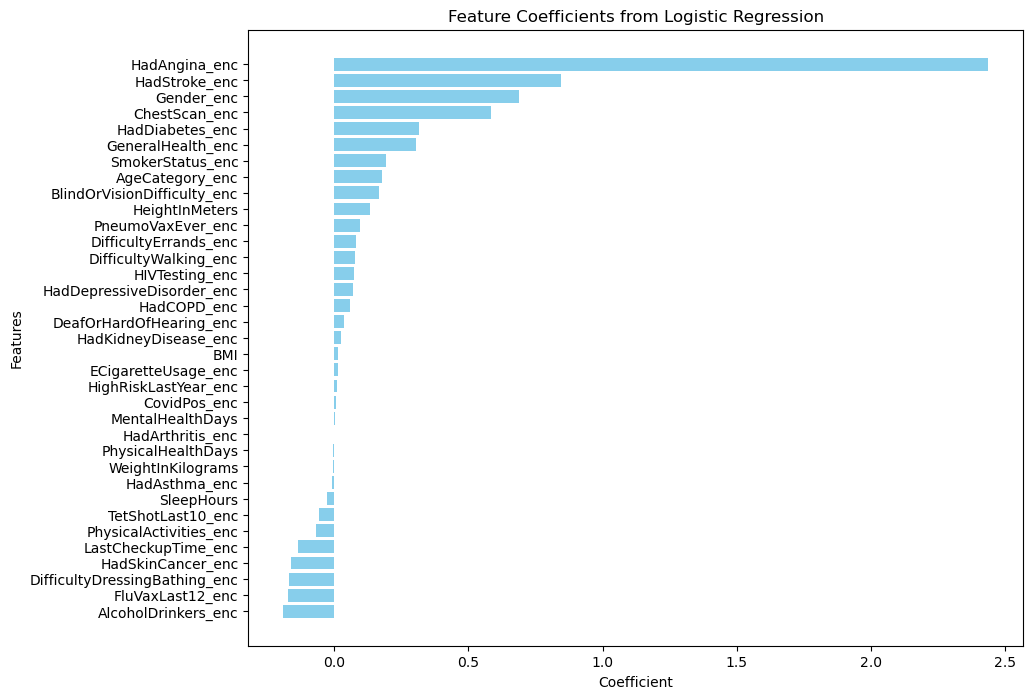

In [307]:
# Sort the DataFrame by coefficient values
logreg_coeff1_sorted = logreg_coeff2.sort_values(by="Coeff", ascending=False)

# Plot coefficients
plt.figure(figsize=(10, 8))
plt.barh(logreg_coeff1_sorted.index, logreg_coeff1_sorted['Coeff'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Feature Coefficients from Logistic Regression')
plt.gca().invert_yaxis()  # To display the highest coefficients on top
plt.show()

Pipeline Gridsearch Logreg Model 3

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify = y) # Splitting the data into an 80 / 20 (training / testing) split in data

In [310]:
# Making a pipeline esimator list 
lr_estimators = [('scaler', StandardScaler()),
                    ('lr', LogisticRegression(max_iter=1000, random_state=12))
]

pipe = Pipeline(lr_estimators)
print(pipe) # Checking the pipe has been correctly made

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr', LogisticRegression(max_iter=1000, random_state=12))])


In [311]:
# Defining V3 grid search

C = ([.00000001, .0000001, .000001, .00001, .0001, .001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])

penalty = ['l1', 'l2']

solver = ['saga', 'liblinear']

params = [dict(
    lr = [LogisticRegression()],
    lr__C = C,
    lr__penalty = penalty,
    lr__solver = solver
)]
display(params)

[{'lr': [LogisticRegression()],
  'lr__C': [1e-08,
   1e-07,
   1e-06,
   1e-05,
   0.0001,
   0.001,
   0.1,
   1,
   10,
   100,
   1000,
   10000,
   100000,
   1000000,
   10000000,
   100000000,
   1000000000],
  'lr__penalty': ['l1', 'l2'],
  'lr__solver': ['saga', 'liblinear']}]

In [106]:
grid_search_model_V1 = GridSearchCV(estimator= pipe, param_grid=params, scoring='recall',cv=5, n_jobs= 3, verbose= 2) #for more information needed and to try on subsequent models
grid_search_model_V1.fit(X_train, y_train)

Fitting 5 folds for each of 68 candidates, totalling 340 fits
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.2s
[CV] END lr=LogisticRegress

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=12))]),
             n_jobs=3,
             param_grid=[{'lr': [LogisticRegression(C=1e-08,
                                                    solver='liblinear')],
                          'lr__C': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                    0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000, 10000000, 100000000, 1000000000],
                          'lr__penalty': ['l1', 'l2'],
                          'lr__solver': ['saga', 'liblinear']}],
             scoring='recall', verbose=2)

In [312]:
# Extracting the essential information 

# Result of the grid search optimisation process - best hyperparameter and best model
print('Best Score:', grid_search_model_V1.best_score_); 
print('Best C Value:', grid_search_model_V1.best_estimator_.get_params()['lr__C'])
print('Best lr Model:', grid_search_model_V1.best_estimator_.get_params()['lr'])
print('Best penalty:', grid_search_model_V1.best_estimator_.get_params()['lr__penalty'])
print('Best solver:', grid_search_model_V1.best_estimator_.get_params()['lr__solver'])


Best Score: 0.5240985206748408
Best C Value: 1e-08
Best lr Model: LogisticRegression(C=1e-08, solver='liblinear')
Best penalty: l2
Best solver: liblinear


In [313]:
best_lr_pipe = grid_search_model_V1.best_estimator_

In [314]:
best_lr_pipe.predict(X_test)

array([0., 0., 0., ..., 1., 0., 0.])

In [268]:
# Making the train and test predictions for the pipeed decision tree model
y_train_blrpipe_pred = best_lr_pipe.predict(X_train)
y_test_blrpipe_pred = best_lr_pipe.predict(X_test)

In [269]:
# Obtaining the best score on the train and test data for the best pipe model
print(f'Score on train: {best_lr_pipe.score(X_train, y_train)}')
print(f'Score on test: {best_lr_pipe.score(X_test, y_test)}')

Score on train: 0.9130551871668623
Score on test: 0.9133960691855857


Train Metrics

In [270]:
# Classification Report (accuracy, precision, recall, f1)
report_blrpipe_train = classification_report(y_train, y_train_blrpipe_pred)
print(report_blrpipe_train)

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95    186055
         1.0       0.32      0.52      0.40     10748

    accuracy                           0.91    196803
   macro avg       0.65      0.73      0.68    196803
weighted avg       0.94      0.91      0.92    196803



[[174061  11994]
 [  5117   5631]]


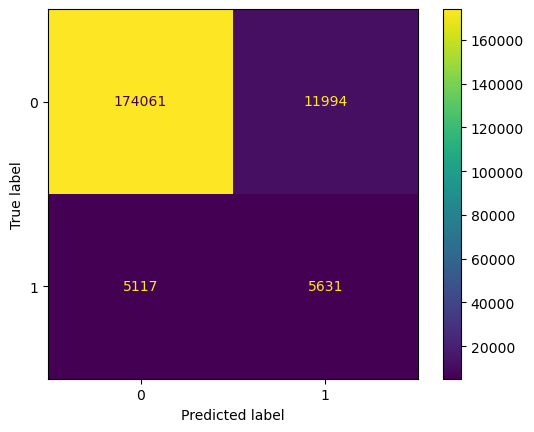

In [279]:
# Confusion Matrix (table + plot)
cm_blrpipe_train = confusion_matrix(y_train, y_train_blrpipe_pred)
print(cm_blrpipe_train)
ConfusionMatrixDisplay(confusion_matrix=cm_blrpipe_train).plot();

In [ ]:
# ROC Curve
RocCurveDisplay(roc_auc=best_lr_pipe, X_test, y_test);

Test Metrics

In [108]:
# Obtaining the best score from the V1 model
grid_search_model_V1.best_score_

0.5240985206748408

In [259]:
# Classification Report (accuracy, precision, recall, f1)
report_blrpipe_test = classification_report(y_test, y_test_blrpipe_pred)
print(report_blrpipe_test)

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95     46514
         1.0       0.32      0.51      0.39      2687

    accuracy                           0.91     49201
   macro avg       0.64      0.72      0.67     49201
weighted avg       0.94      0.91      0.92     49201



[[43561  2953]
 [ 1308  1379]]


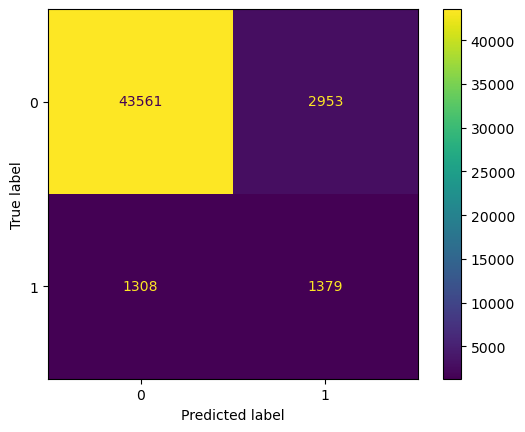

In [280]:
# Confusion Matrix (table + plot)
cm_blrpipe_test = confusion_matrix(y_test, y_test_blrpipe_pred)
print(cm_blrpipe_test)
ConfusionMatrixDisplay(confusion_matrix=cm_blrpipe_test).plot();

In [316]:
print(best_lr_pipe.named_steps)

{'scaler': StandardScaler(), 'lr': LogisticRegression(C=1e-08, solver='liblinear')}


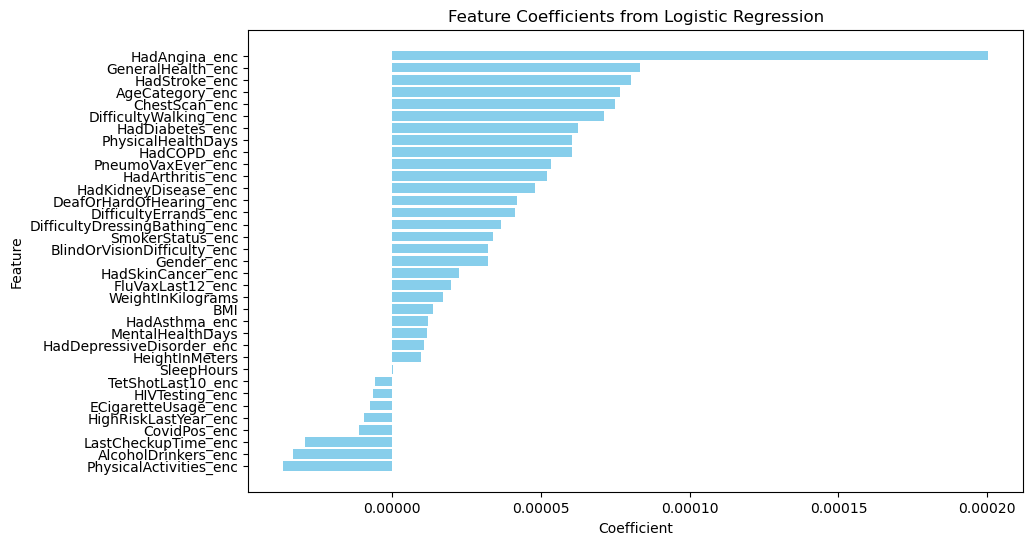

In [317]:
# Extract the logistic regression model from the pipeline
best_lr_logreg_model = best_lr_pipe.named_steps['lr']

# Get the coefficients
coeff = best_lr_logreg_model.coef_[0]

# Create a DataFrame for the coefficients
logreg_coeff3 = pd.DataFrame(coeff, index=X_train.columns, columns=['Coeff'])

# Sort the DataFrame by coefficient values
logreg_coeff3_sorted = logreg_coeff3.sort_values(by='Coeff', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(logreg_coeff3_sorted.index, logreg_coeff3_sorted['Coeff'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients from Logistic Regression')
plt.gca().invert_yaxis()  # To display the highest coefficients on top
plt.show()


LogregModel 4 (l1)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify = y) # Splitting the data into an 80 / 20 (training / testing) split in data

In [155]:
# Making a pipeline esimator list 
lr_estimators = [('scaler', StandardScaler()),
                    ('lr', LogisticRegression(max_iter=1000, random_state=12))
]

pipe = Pipeline(lr_estimators)
print(pipe) # Checking the pipe has been correctly made

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr', LogisticRegression(max_iter=1000, random_state=12))])


In [157]:
# Defining V3 grid search

C = ([.00000001, .0000001, .000001, .00001, .0001, .001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])

penalty = ['l1']

solver = ['saga', 'liblinear']

params = [dict(
    lr = [LogisticRegression()],
    lr__C = C,
    lr__penalty = penalty,
    lr__solver = solver
)]
display(params)

[{'lr': [LogisticRegression()],
  'lr__C': [1e-08,
   1e-07,
   1e-06,
   1e-05,
   0.0001,
   0.001,
   0.1,
   1,
   10,
   100,
   1000,
   10000,
   100000,
   1000000,
   10000000,
   100000000,
   1000000000],
  'lr__penalty': ['l1'],
  'lr__solver': ['saga', 'liblinear']}]

In [158]:
grid_search_model_V2 = GridSearchCV(estimator= pipe, param_grid=params, scoring='recall',cv=5, n_jobs= 3, verbose= 2) #for more information needed and to try on subsequent models
grid_search_model_V2.fit(X_train, y_train)

Fitting 5 folds for each of 34 candidates, totalling 170 fits
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=saga; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.2s
[CV] END lr=LogisticRegression(), lr__C=1e-08, lr__penalty=l1, lr__solver=liblinear; total time=   0.2s
[CV] END lr=LogisticRegress

/opt/anaconda3/envs/capstone/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END lr=LogisticRegression(), lr__C=100000, lr__penalty=l1, lr__solver=liblinear; total time=   3.4s
[CV] END lr=LogisticRegression(), lr__C=100000, lr__penalty=l1, lr__solver=liblinear; total time=   3.3s
[CV] END lr=LogisticRegression(), lr__C=1000000, lr__penalty=l1, lr__solver=saga; total time=   1.8s
[CV] END lr=LogisticRegression(), lr__C=100000, lr__penalty=l1, lr__solver=liblinear; total time=   3.5s
[CV] END lr=LogisticRegression(), lr__C=100000, lr__penalty=l1, lr__solver=liblinear; total time=   3.8s
[CV] END lr=LogisticRegression(), lr__C=1000000, lr__penalty=l1, lr__solver=saga; total time=   1.9s
[CV] END lr=LogisticRegression(), lr__C=1000000, lr__penalty=l1, lr__solver=saga; total time=   1.6s
[CV] END lr=LogisticRegression(), lr__C=1000000, lr__penalty=l1, lr__solver=saga; total time=   1.5s
[CV] END lr=LogisticRegression(), lr__C=1000000, lr__penalty=l1, lr__solver=liblinear; total time=   0.7s
[CV] END lr=LogisticRegression(), lr__C=1000000, lr__penalty=l1, lr__s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=12))]),
             n_jobs=3,
             param_grid=[{'lr': [LogisticRegression(C=1, penalty='l1',
                                                    solver='saga')],
                          'lr__C': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                    0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000, 10000000, 100000000, 1000000000],
                          'lr__penalty': ['l1'],
                          'lr__solver': ['saga', 'liblinear']}],
             scoring='recall', verbose=2)

In [159]:
# Extracting the essential information 

# Result of the grid search optimisation process - best hyperparameter and best model
print('Best Score:', grid_search_model_V2.best_score_); 
print('Best C Value:', grid_search_model_V2.best_estimator_.get_params()['lr__C'])
print('Best lr Model:', grid_search_model_V2.best_estimator_.get_params()['lr'])
print('Best penalty:', grid_search_model_V2.best_estimator_.get_params()['lr__penalty'])
print('Best solver:', grid_search_model_V2.best_estimator_.get_params()['lr__solver'])

Best Score: 0.24795420260369888
Best C Value: 1
Best lr Model: LogisticRegression(C=1, penalty='l1', solver='saga')
Best penalty: l1
Best solver: saga


In [160]:
# Obtaining the best score from the V1 model
grid_search_model_V2.best_score_
# Obtaining V1 score 
grid_search_model_V2.score(X_test, y_test)

0.24413844436174173

In [262]:
# Obtaining a prediction
y_pred = grid_search_model_V2.best_estimator_.predict(X_test)

In [161]:
# Classification Report for the Logistic Regression Grid Search
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     46514
         1.0       0.56      0.24      0.34      2687

    accuracy                           0.95     49201
   macro avg       0.76      0.62      0.66     49201
weighted avg       0.94      0.95      0.94     49201



#### Final Logistic Regression Model

In [ ]:
# Optimise with the best Parameters from the best logreg model

final_model = LogisticRegression(C=,random_state=)

# Remember that X_remainder and y_remainder held the data I split into train and validation
# I can use that data to re-train my model
final_model.fit(,)

final_model.score(X_test, y_test)

#### Model - Random Forest

Grid Search - Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
#random_forest_model = RandomForestClassifier(n_estimators=50 ) # setting max features is not needed here as our dataset only has 2 features.
#random_forest_model.fit(X_train, y_train)
 
#plot_decision_regions(X_train, y_train, clf=random_forest_model);

In [142]:
# Making a pipeline esimator list 
PCA_rf_estimators = [('scaler', StandardScaler()),
                    ('PCA', PCA()),
                    ('rf', RandomForestClassifier(random_state=12))
]

pipe = Pipeline(PCA_rf_estimators)
print(pipe) # Checking the pipe has been correctly made

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA()),
                ('rf', RandomForestClassifier(random_state=12))])


In [150]:
# Defining rf V1 grid search

n_estimators = [100, 200]
max_depth = [5, 8]
min_samples_split = [2, 5]
min_samples_leaf = [5, 10]
max_features = ['auto', 'sqrt', 'log2']

params = dict(
    rf = [RandomForestClassifier()],
    rf__n_estimators = n_estimators,
    rf__max_depth = max_depth,
    rf__min_samples_split = min_samples_split,
    rf__min_samples_leaf = min_samples_leaf,
    rf__max_features = max_features
)
display(params)

{'rf': [RandomForestClassifier()],
 'rf__n_estimators': [100, 200],
 'rf__max_depth': [5, 8],
 'rf__min_samples_split': [2, 5],
 'rf__min_samples_leaf': [5, 10],
 'rf__max_features': ['auto', 'sqrt', 'log2']}

In [151]:
grid_search_model_rf_V1 = GridSearchCV(estimator= pipe, param_grid=params, scoring='recall',cv=5, n_jobs= 3, verbose= 2)
grid_search_model_rf_V1.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END rf=RandomForestClassifier(), rf__max_depth=5, rf__max_features=auto, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100; total time=  25.6s
[CV] END rf=RandomForestClassifier(), rf__max_depth=5, rf__max_features=auto, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100; total time=  25.7s
[CV] END rf=RandomForestClassifier(), rf__max_depth=5, rf__max_features=auto, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100; total time=  25.9s
[CV] END rf=RandomForestClassifier(), rf__max_depth=5, rf__max_features=auto, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100; total time=  25.8s
[CV] END rf=RandomForestClassifier(), rf__max_depth=5, rf__max_features=auto, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100; total time=  25.9s
[CV] END rf=RandomForestClassifier(), rf__max_depth=5, rf__max_features=auto, rf__min_samples_leaf

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('PCA', PCA()),
                                       ('rf',
                                        RandomForestClassifier(random_state=12))]),
             n_jobs=3,
             param_grid={'rf': [RandomForestClassifier(max_depth=8,
                                                       min_samples_leaf=5)],
                         'rf__max_depth': [5, 8],
                         'rf__max_features': ['auto', 'sqrt', 'log2'],
                         'rf__min_samples_leaf': [5, 10],
                         'rf__min_samples_split': [2, 5],
                         'rf__n_estimators': [100, 200]},
             scoring='recall', verbose=2)

In [162]:
# Extracting the essential information 

# Result of the grid search optimisation process - best hyperparameter and best model
print('Best Score:', grid_search_model_rf_V1.best_score_); 
print('Best Max Depth:', grid_search_model_rf_V1.best_estimator_.get_params()['rf__max_depth'])
print('Best Max Features:', grid_search_model_rf_V1.best_estimator_.get_params()['rf__max_features'])
print('Best Min Samples Leaf:', grid_search_model_rf_V1.best_estimator_.get_params()['rf__min_samples_leaf'])
print('Best Min Samples Split:', grid_search_model_rf_V1.best_estimator_.get_params()['rf__min_samples_split'])
print('Best n estimators:', grid_search_model_rf_V1.best_estimator_.get_params()['rf__n_estimators'])

Best Score: 0.019757688723205966
Best Max Depth: 8
Best Max Features: auto
Best Min Samples Leaf: 5
Best Min Samples Split: 2
Best n estimators: 100


In [264]:
best_rf1 = grid_search_model_rf_V1.best_estimator_

In [181]:
# Prediction
y_pred = best_rf1.predict(X_test)

# Recall Prediction Score
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

Recall: 0.04391514700409378


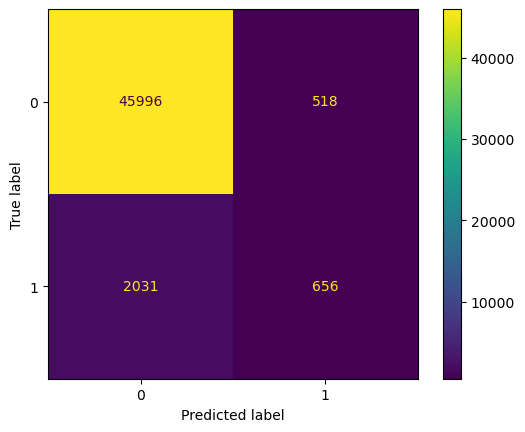

In [265]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [296]:
from sklearn import tree
from sklearn.tree import plot_tree

tree.plot_tree(grid_search_model_rf_V1.best_estimator_.estimators_)

Random Forest 2 Model 4

#### Best Grid Search Model